In [2]:
# import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

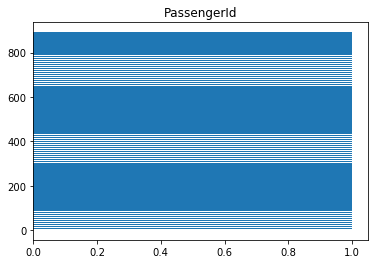

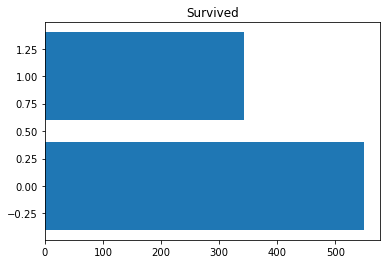

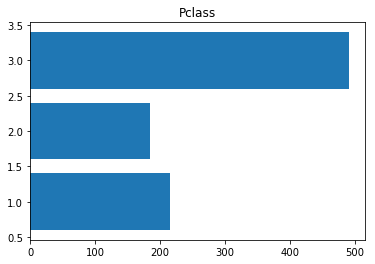

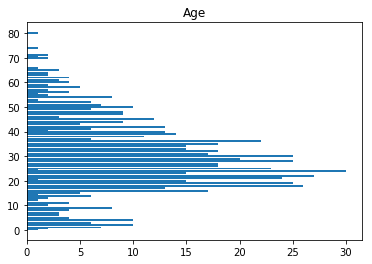

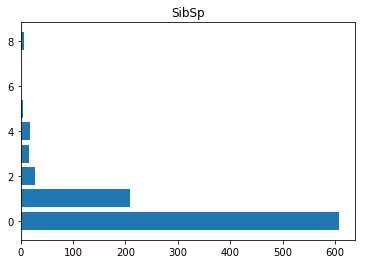

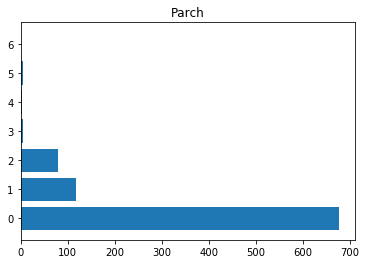

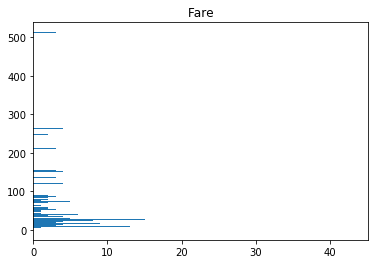

In [54]:
# navigate to Data sets
# os.chdir('/Users/davidxue/Github/k_titanic')

# load sample dataset into dataframe
train_df = pd.read_csv('train.csv', na_values='?' )
test_df = pd.read_csv('test.csv', na_values='?' )

# run exploratory analysis
# print(train_df.head(3))
# print(test_df.head(3))

# print(train_df.info())
# print(test_df.info())



# tally and graph all int and float cols individually
train_cols = train_df.columns.values
train_cols_num = train_df.select_dtypes(include=['int', 'float'])

for col in train_cols_num:
    y = train_df.groupby(col)[col].count().sort_values(ascending=False)
    x = y.index
    plt.barh(x,y)
    plt.title(col)
    plt.show()

In [58]:
# create features matrix X and labels vector y
X = train_df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)
X['Age'] = X['Age'].fillna(-9999)  # fill numeric NA values 
X['Embarked'] = X['Embarked'].fillna('N/A')  # fill string NA values
y = train_df['Survived'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
print(X_train.head())
print('\n', y_train[0:5])
print(X_train.info())

     Pclass     Sex     Age  SibSp  Parch     Fare Embarked
6         1    male    54.0      0      0  51.8625        S
718       3    male -9999.0      0      0  15.5000        Q
685       2    male    25.0      1      2  41.5792        C
73        3    male    26.0      1      0  14.4542        C
882       3  female    22.0      0      0  10.5167        S

 [0 0 0 0 0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 6 to 102
Data columns (total 7 columns):
Pclass      596 non-null int64
Sex         596 non-null object
Age         596 non-null float64
SibSp       596 non-null int64
Parch       596 non-null int64
Fare        596 non-null float64
Embarked    596 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 37.2+ KB
None


In [57]:
# label encode the strings
le=LabelEncoder()
print(X_train.columns.values)
print(X_train.dtypes)

for col in X_train.columns.values:
    #print(X_train[col].dtypes)
    if X_train[col].dtypes == 'object':
        X_train[col]=le.fit_transform(X_train[col].values)
        X_test[col]=le.fit_transform(X_test[col].values)

print(X_train.dtypes)
print(X_train.head())

['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object
     Pclass  Sex     Age  SibSp  Parch     Fare  Embarked
6         1    1    54.0      0      0  51.8625         3
718       3    1 -9999.0      0      0  15.5000         2
685       2    1    25.0      1      2  41.5792         0
73        3    1    26.0      1      0  14.4542         0
882       3    0    22.0      0      0  10.5167         3


In [6]:
%%time

# reshape target data
y_train.reshape(-1,1)

# Fitting a logistic regression model
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

print(y_pred)
print('\n\nconfusion matrix\n', confusion_matrix(y_test, y_pred))
print('\naccuracy', accuracy_score(y_test, y_pred))

coef = pd.DataFrame(log.coef_, columns=X_train.columns.values)
print('\n',coef)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0]


confusion matrix
 [[149  26]
 [ 35  85]]

accuracy 0.7932203389830509

      Pclass     Sex       Age     SibSp     Parch      Fare  Embarked
0 -0.421807 -2.0203  0.000041 -0.215932 -0.025985  0.005271   -0.2248
Wall time: 63 ms


In [7]:
%%time

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)

print(y_pred)
print('\n\nconfusion matrix\n', confusion_matrix(y_test, y_pred))
print('\naccuracy', accuracy_score(y_test, y_pred))

# determine which features are most important to the model

for i in X_test.columns.values:
    X = X_test[i].values.reshape(-1, 1)
    scores = cross_val_score(knn, X, y_test)
    print(i,': ',scores.mean())

[0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0]


confusion matrix
 [[149  26]
 [ 56  64]]

accuracy 0.7220338983050848
Pclass :  0.4952243523672095
Sex :  0.7966398680684396
Age :  0.5321926750498179
SibSp :  0.5726654298082869
Parch :  0.5522229093657666
Fare :  0.6202501202501203
Embarked :  0.5250807393664537
Wall time: 75 ms


In [8]:
%%time

# Create a random forest classifier 
rfc = RandomForestClassifier(n_jobs=2, random_state=0)
# fit the model using training data and predict y_test using X_test data
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(y_pred)
print('\n\nconfusion matrix\n', confusion_matrix(y_test, y_pred))
print('\naccuracy', accuracy_score(y_test, y_pred), '\n')

feat_values = list(zip(X_train.columns.values, rfc.feature_importances_))
for _ in feat_values:
    print(_)

[1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0]


confusion matrix
 [[150  25]
 [ 33  87]]

accuracy 0.8033898305084746 

('Pclass', 0.08901634063464506)
('Sex', 0.22216722383369275)
('Age', 0.27738569341309394)
('SibSp', 0.04970923020632049)
('Parch', 0.056141521723248836)
('Fare', 0.26600939892209907)
('Embarked', 0.039570591266899866)
Wall time: 361 ms
